# NEWS CATEGORIZER

#Normalization

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib

from categorizer import Normalizer
from categorizer import Analyzer
from categorizer import Vectorizer

#Import json data into DF
#dataset: https://www.kaggle.com/rmisra/news-category-dataset
src = 'News_Category_Dataset_v2.json'
normalizer = Normalizer(src,5000)



normalizer.load_file_json()



normalizer.data.head(100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,headline,authors,link,short_description,date
0,GOOD NEWS,Do You Have a Green Thumb With People?,"Peg Melnik, ContributorJournalist",https://www.huffingtonpost.com/entry/do-you-ha...,I once read that we should all tend to the peo...,2014-06-22
1,WELLNESS,30 Celebrities Yawning (PHOTOS),,https://www.huffingtonpost.com/entry/sleep-cel...,"In general, researchers tend to fall into one ...",2012-05-17
2,WELLNESS,Cultivating Equanimity Through Adversity: What...,"Lauren Cahn, Contributor\nSmall girl, LARGE op...",https://www.huffingtonpost.com/entry/handling-...,I didn't choose to cultivate equanimity. It c...,2013-03-23
3,POLITICS,The Problem With Paternalizing Disabled People...,"Kim Sauder, ContributorPhD student",https://www.huffingtonpost.com/entry/the-probl...,"More than a week after the 2016 U.S. election,...",2016-11-27
4,POLITICS,A Lesson In Civility For Senator Jeff Sessions,"Wendi Nunnery, ContributorWriter. Wife. Wanderer.",https://www.huffingtonpost.com/entry/a-lesson-...,Donald Trump and Sen. Sessions have both made ...,2016-11-29
...,...,...,...,...,...,...
95,ENTERTAINMENT,"Fyvush Finkel, 'Boston Public' And 'Picket Fen...",Julia Brucculieri,https://www.huffingtonpost.com/entry/fyvush-fi...,The actor died on Sunday in Manhattan.,2016-08-15
96,TASTE,The Super Simple Trick To Poaching A Lot Of Eg...,Julie R. Thomson,https://www.huffingtonpost.com/entry/poached-e...,You don't even need to bring a pot of water to...,2017-02-08
97,STYLE,Olivia Palermo Proves You Don't Have To Dress ...,Michelle Persad,https://www.huffingtonpost.com/entry/olivia-pa...,This lady does it again.,2016-01-28
98,PARENTING,No Longer a Mom to Single-Digits: Parenting Tw...,"Rachel Blaufeld, Contributor\nBestselling Roma...",https://www.huffingtonpost.com/entry/no-longer...,I was excited to watch my big guy hit these ma...,2013-05-23


In [2]:
normalizer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           5000 non-null   object
 1   headline           5000 non-null   object
 2   authors            5000 non-null   object
 3   link               5000 non-null   object
 4   short_description  5000 non-null   object
 5   date               5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB
None


In [3]:
#normalizer.concat_cols('text',['headline','short_description'])
#normalizer.concat_cols('text',['headline','authors'])
normalizer.save_col('text','authors')


normalizer.data.head(100)





,category,headline,authors,link,short_description,date,text
0,GOOD NEWS,Do You Have a Green Thumb With People?,"Peg Melnik, ContributorJournalist",https://www.huffingtonpost.com/entry/do-you-ha...,I once read that we should all tend to the peo...,2014-06-22,"Peg Melnik, ContributorJournalist"
1,WELLNESS,30 Celebrities Yawning (PHOTOS),,https://www.huffingtonpost.com/entry/sleep-cel...,"In general, researchers tend to fall into one ...",2012-05-17,
2,WELLNESS,Cultivating Equanimity Through Adversity: What...,"Lauren Cahn, Contributor\nSmall girl, LARGE op...",https://www.huffingtonpost.com/entry/handling-...,I didn't choose to cultivate equanimity. It c...,2013-03-23,"Lauren Cahn, Contributor\nSmall girl, LARGE op..."
3,POLITICS,The Problem With Paternalizing Disabled People...,"Kim Sauder, ContributorPhD student",https://www.huffingtonpost.com/entry/the-probl...,"More than a week after the 2016 U.S. election,...",2016-11-27,"Kim Sauder, ContributorPhD student"
4,POLITICS,A Lesson In Civility For Senator Jeff Sessions,"Wendi Nunnery, ContributorWriter. Wife. Wanderer.",https://www.huffingtonpost.com/entry/a-lesson-...,Donald Trump and Sen. Sessions have both made ...,2016-11-29,"Wendi Nunnery, ContributorWriter. Wife. Wanderer."
...,...,...,...,...,...,...,...
95,ENTERTAINMENT,"Fyvush Finkel, 'Boston Public' And 'Picket Fen...",Julia Brucculieri,https://www.huffingtonpost.com/entry/fyvush-fi...,The actor died on Sunday in Manhattan.,2016-08-15,Julia Brucculieri
96,TASTE,The Super Simple Trick To Poaching A Lot Of Eg...,Julie R. Thomson,https://www.huffingtonpost.com/entry/poached-e...,You don't even need to bring a pot of water to...,2017-02-08,Julie R. Thomson
97,STYLE,Olivia Palermo Proves You Don't Have To Dress ...,Michelle Persad,https://www.huffingtonpost.com/entry/olivia-pa...,This lady does it again.,2016-01-28,Michelle Persad
98,PARENTING,No Longer a Mom to Single-Digits: Parenting Tw...,"Rachel Blaufeld, Contributor\nBestselling Roma...",https://www.huffingtonpost.com/entry/no-longer...,I was excited to watch my big guy hit these ma...,2013-05-23,"Rachel Blaufeld, Contributor\nBestselling Roma..."


In [4]:
normalizer.drop_cols(['date', 'link', 'short_description', 'headline', 'authors'])
normalizer.data.head(100)

,category,text
0,GOOD NEWS,"Peg Melnik, ContributorJournalist"
1,WELLNESS,
2,WELLNESS,"Lauren Cahn, Contributor\nSmall girl, LARGE op..."
3,POLITICS,"Kim Sauder, ContributorPhD student"
4,POLITICS,"Wendi Nunnery, ContributorWriter. Wife. Wanderer."
...,...,...
95,ENTERTAINMENT,Julia Brucculieri
96,TASTE,Julie R. Thomson
97,STYLE,Michelle Persad
98,PARENTING,"Rachel Blaufeld, Contributor\nBestselling Roma..."


In [5]:
normalizer.drop_stopwords(['text'])

normalizer.data.head(100)






,category,text
0,GOOD NEWS,"Peg Melnik, ContributorJournalist"
1,WELLNESS,
2,WELLNESS,"Lauren Cahn, Contributor Small girl, LARGE opi..."
3,POLITICS,"Kim Sauder, ContributorPhD student"
4,POLITICS,"Wendi Nunnery, ContributorWriter. Wife. Wanderer."
...,...,...
95,ENTERTAINMENT,Julia Brucculieri
96,TASTE,Julie R. Thomson
97,STYLE,Michelle Persad
98,PARENTING,"Rachel Blaufeld, Contributor Bestselling Roman..."


In [6]:
normalizer.to_lower(['text','category'])
normalizer.data.head(100)

,category,text
0,good news,"peg melnik, contributorjournalist"
1,wellness,
2,wellness,"lauren cahn, contributor small girl, large opi..."
3,politics,"kim sauder, contributorphd student"
4,politics,"wendi nunnery, contributorwriter. wife. wanderer."
...,...,...
95,entertainment,julia brucculieri
96,taste,julie r. thomson
97,style,michelle persad
98,parenting,"rachel blaufeld, contributor bestselling roman..."


In [7]:
normalizer.drop_num(['text'])
normalizer.data.head(100)

,category,text
0,good news,"peg melnik, contributorjournalist"
1,wellness,
2,wellness,"lauren cahn, contributor small girl, large opi..."
3,politics,"kim sauder, contributorphd student"
4,politics,"wendi nunnery, contributorwriter. wife. wanderer."
...,...,...
95,entertainment,julia brucculieri
96,taste,julie r. thomson
97,style,michelle persad
98,parenting,"rachel blaufeld, contributor bestselling roman..."


In [8]:
normalizer.drop_spec(['text'])
normalizer.data.head(100)

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\normalizer.py:60: FutureWarning: The default value of regex will change from True to False in a future version.
  self.data[c] = self.data[c].str.replace('[^\w\s]', '')


,category,text
0,good news,peg melnik contributorjournalist
1,wellness,
2,wellness,lauren cahn contributor small girl large opinions
3,politics,kim sauder contributorphd student
4,politics,wendi nunnery contributorwriter wife wanderer
...,...,...
95,entertainment,julia brucculieri
96,taste,julie r thomson
97,style,michelle persad
98,parenting,rachel blaufeld contributor bestselling romanc...


In [9]:
normalizer.drop_rarest(2)
normalizer.data.head(100)

,category,text
0,good news,peg melnik contributorjournalist
1,wellness,
2,wellness,lauren contributor small girl
3,politics,kim student
4,politics,contributorwriter wife
...,...,...
95,entertainment,julia brucculieri
96,taste,julie r thomson
97,style,michelle persad
98,parenting,rachel contributor bestselling romance author ...


In [10]:
normalizer.lemmatize()
#normalizer.data.head(100)

In [11]:
vectorizer = Vectorizer(normalizer.data)

#Visualization

In [12]:
analyzer = Analyzer(normalizer.data.copy())
normalizer.drop_cols(['category'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


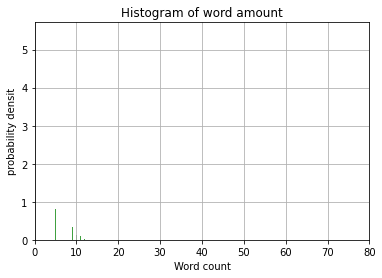

In [13]:
analyzer.word_count('text', 80)

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Word_count'][a] = unique_category['Word_count'][a] + self.data['word_count'][index]
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Amount_of_cat'][a] = unique_category['Amount_of_cat'][a]+1
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

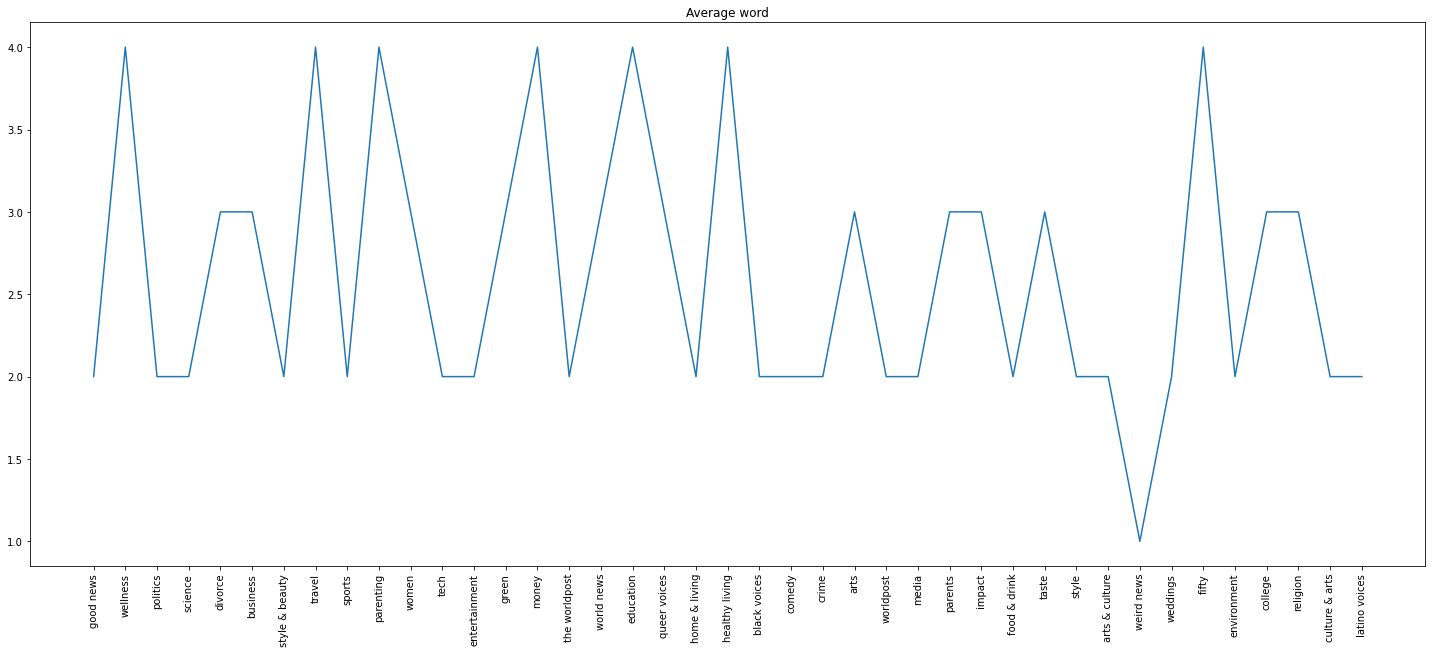

In [14]:
analyzer.word_avg()

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Unique_words'][a] = unique_category['Unique_words'][a] + len(unique_text_words)
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Amount_of_cat'][a] = unique_category['Amount_of_cat'][a]+1
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

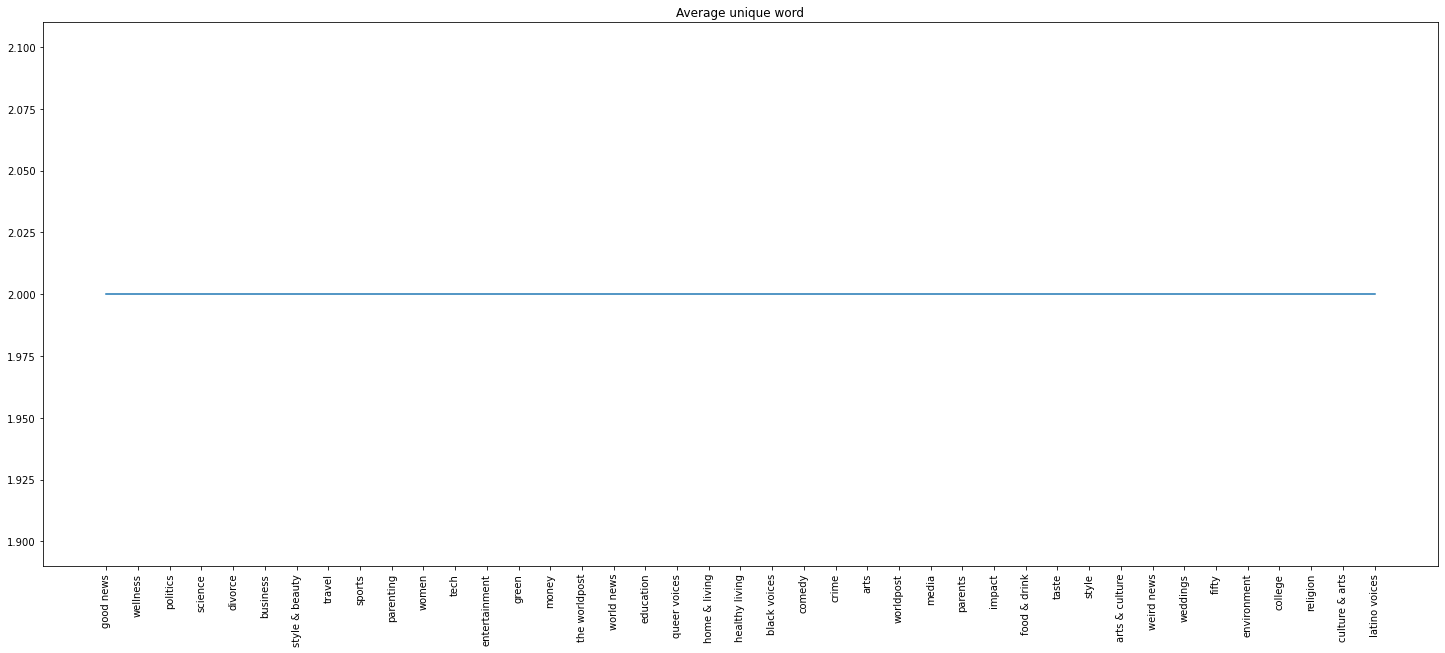

In [15]:

analyzer.word_unique()

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Amount_of_cat'][a] = unique_category['Amount_of_cat'][a]+1


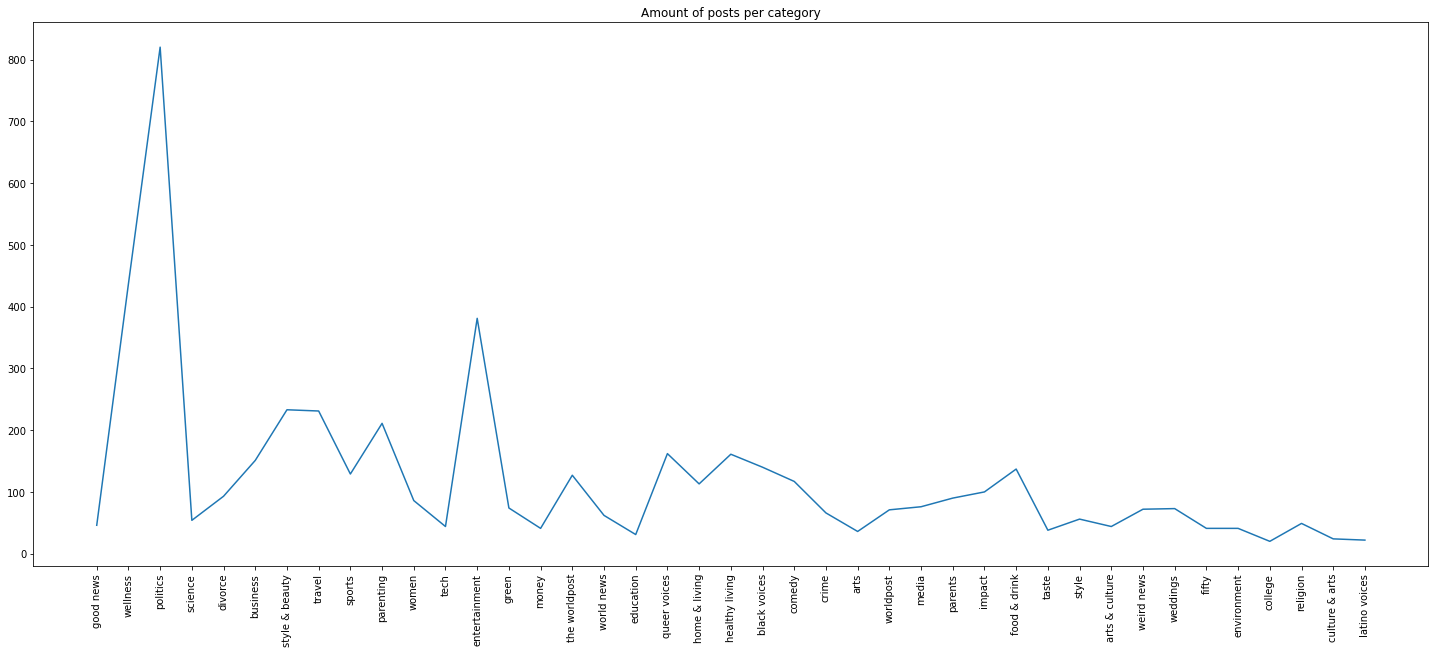

In [16]:
analyzer.amount_of_cat()

In [17]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(vectorizer.data['text'], vectorizer.data['category'])


In [18]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [19]:


count_vect = CountVectorizer(max_features=5000, ngram_range=(1,2),analyzer = "word", token_pattern=r'\w{1,}')
count_vect.fit(vectorizer.data['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)
print(xtrain_count)

  (0, 95)	1
  (0, 98)	1
  (0, 99)	1
  (0, 4169)	1
  (0, 4170)	1
  (3, 88)	1
  (3, 885)	1
  (3, 891)	1
  (3, 895)	1
  (3, 955)	1
  (3, 2270)	1
  (3, 2273)	1
  (3, 3006)	1
  (3, 3007)	1
  (3, 3285)	1
  (3, 3291)	1
  (3, 3488)	1
  (3, 3489)	1
  (3, 4300)	1
  (3, 4302)	1
  (3, 4303)	1
  (3, 4304)	1
  (3, 4852)	1
  (3, 4894)	1
  (4, 254)	1
  :	:
  (3744, 3036)	1
  (3744, 4291)	1
  (3744, 4405)	1
  (3745, 1794)	1
  (3745, 3374)	1
  (3745, 4852)	1
  (3745, 4880)	1
  (3746, 1903)	1
  (3746, 3686)	1
  (3746, 3687)	1
  (3747, 155)	1
  (3747, 162)	1
  (3747, 4442)	1
  (3748, 3919)	1
  (3748, 3993)	1
  (3748, 3994)	1
  (3749, 10)	1
  (3749, 12)	1
  (3749, 636)	1
  (3749, 793)	1
  (3749, 1322)	1
  (3749, 1337)	1
  (3749, 2007)	1
  (3749, 2408)	1
  (3749, 3151)	1


In [20]:
# 2-3 ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(vectorizer.data['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
print(xtrain_tfidf_ngram )


  (0, 3811)	0.5773502691896257
  (0, 28)	0.5773502691896257
  (0, 27)	0.5773502691896257
  (3, 4875)	0.24737062427500497
  (3, 4874)	0.24737062427500497
  (3, 3952)	0.24737062427500497
  (3, 3951)	0.24737062427500497
  (3, 3950)	0.24737062427500497
  (3, 3949)	0.24737062427500497
  (3, 3124)	0.24737062427500497
  (3, 3051)	0.24737062427500497
  (3, 3050)	0.24737062427500497
  (3, 2584)	0.24737062427500497
  (3, 2578)	0.18627000181283146
  (3, 1306)	0.24737062427500497
  (3, 1305)	0.23891760775797785
  (3, 564)	0.24737062427500497
  (3, 563)	0.22700375012094712
  (3, 453)	0.24737062427500497
  (3, 452)	0.24737062427500497
  (4, 3056)	0.25229361392515187
  (4, 3055)	0.25229361392515187
  (4, 2589)	0.24367237164183664
  (4, 2578)	0.18997701146179438
  (4, 2561)	0.25229361392515187
  :	:
  (3735, 3533)	0.5773502691896257
  (3735, 3532)	0.5773502691896257
  (3736, 1332)	1.0
  (3737, 3634)	1.0
  (3738, 2745)	1.0
  (3739, 3609)	1.0
  (3740, 2238)	1.0
  (3741, 1634)	1.0
  (3742, 464)	0.6032661

In [21]:
# 1-3 ngram level tf-idf 

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=5000)
tfidf_vect_ngram.fit(vectorizer.data['text'])
xtrain_tfidf_ngram13 =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram13 =  tfidf_vect_ngram.transform(valid_x)
print(xtrain_tfidf_ngram13 )

  (0, 4240)	0.40944291643772707
  (0, 4239)	0.40944291643772707
  (0, 63)	0.40944291643772707
  (0, 62)	0.40944291643772707
  (0, 61)	0.40944291643772707
  (0, 59)	0.40222194233388386
  (3, 4926)	0.21063103362419702
  (3, 4925)	0.21063103362419702
  (3, 4896)	0.10568324641957619
  (3, 4371)	0.21063103362419702
  (3, 4370)	0.21063103362419702
  (3, 4369)	0.21063103362419702
  (3, 4368)	0.21063103362419702
  (3, 4367)	0.21063103362419702
  (3, 4364)	0.1932890563084345
  (3, 3657)	0.21063103362419702
  (3, 3656)	0.21063103362419702
  (3, 3520)	0.21063103362419702
  (3, 3519)	0.21063103362419702
  (3, 3511)	0.14916550763205208
  (3, 3156)	0.21063103362419702
  (3, 3154)	0.15860510167690953
  (3, 3153)	0.14916550763205208
  (3, 2264)	0.21063103362419702
  (3, 2263)	0.2034334627265125
  :	:
  (3744, 2293)	0.34948650112657614
  (3744, 2291)	0.2995063141261588
  (3744, 868)	0.2169842411216011
  (3744, 853)	0.11392389116021873
  (3744, 253)	0.16621545768988474
  (3745, 4896)	0.4066719411385598


In [22]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

results=[]

accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
results.append("NB, Count Vectors: "+ str(accuracy))

In [23]:
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
results.append("NB, 2-3-Gram Vectors TF-IDF: " + str(accuracy))

In [24]:
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram13, train_y, xvalid_tfidf_ngram13)
results.append("NB, 1-3-Gram Vectors TF-IDF: " + str(accuracy))

In [25]:
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
results.append("LR, Count Vectors: " + str(accuracy))

In [26]:
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
results.append("LR, 2-3-Gram Vectors: " + str(accuracy))

In [27]:
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram13, train_y, xvalid_tfidf_ngram13)
results.append("LR, 1-3-Gram Vectors: " + str(accuracy))

In [28]:
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
results.append("RF, Count Vectors: " + str(accuracy))

In [29]:
results

['NB, Count Vectors: 0.4384',
 'NB, 2-3-Gram Vectors TF-IDF: 0.3072',
 'NB, 1-3-Gram Vectors TF-IDF: 0.3504',
 'LR, Count Vectors: 0.4384',
 'LR, 2-3-Gram Vectors: 0.364',
 'LR, 1-3-Gram Vectors: 0.3928',
 'RF, Count Vectors: 0.4416']

Szacowanie kategorii na podstawie treści, obserwacje:

    1
        CLASSIFIER: NAIVE BAYES, LINEAR, RANDOM FORREST
        
        Dane wejściowe: dataset: 5000  drop_rare: >= 1
        concat_cols =  [headline, short_description]

        ['NB, Count Vectors: 0.4328',
         'NB, 2-3-Gram Vectors TF-IDF: 0.2104',
         'NB, 1-3-Gram Vectors TF-IDF: 0.2984',
         'LR, Count Vectors: 0.4424',
         'LR, 2-3-Gram Vectors: 0.2304',
         'LR, 1-3-Gram Vectors: 0.396',
         'RF, Count Vectors: 0.4304']

        concat_cols =  [headline, authors]

         ['NB, Count Vectors: 0.5336',
          'NB, 2-3-Gram Vectors TF-IDF: 0.332',
          'NB, 1-3-Gram Vectors TF-IDF: 0.3792',
          'LR, Count Vectors: 0.5496',
          'LR, 2-3-Gram Vectors: 0.3784',
          'LR, 1-3-Gram Vectors: 0.4464',
          'RF, Count Vectors: 0.5048']

        concat_cols =  ['short_description','authors']

        ['NB, Count Vectors: 0.4752',
        'NB, 2-3-Gram Vectors TF-IDF: 0.3096',
        'NB, 1-3-Gram Vectors TF-IDF: 0.3576',
        'LR, Count Vectors: 0.492',
        'LR, 2-3-Gram Vectors: 0.3792',
        'LR, 1-3-Gram Vectors: 0.4272',
        'RF, Count Vectors: 0.4768']

        save_col =  authors

        ['NB, Count Vectors: 0.4384',
         'NB, 2-3-Gram Vectors TF-IDF: 0.3072',
         'NB, 1-3-Gram Vectors TF-IDF: 0.3504',
         'LR, Count Vectors: 0.4384',
         'LR, 2-3-Gram Vectors: 0.364',
         'LR, 1-3-Gram Vectors: 0.3928',
         'RF, Count Vectors: 0.4416']
         

         concat_cols =  [headline, short_description]
         bez usunięcia wartości liczbowych
         ['NB, Count Vectors: 0.432',
          'NB, 2-3-Gram Vectors TF-IDF: 0.2088',
          'NB, 1-3-Gram Vectors TF-IDF: 0.3',
          'LR, Count Vectors: 0.4656',
          'LR, 2-3-Gram Vectors: 0.2312',
          'LR, 1-3-Gram Vectors: 0.4096',
          'RF, Count Vectors: 0.436']


        Dane wejściowe: dataset: 5000  drop_rare: >= 2
        concat_cols =  [headline, short_description]
        
        ['NB, Count Vectors: 0.4432',
         'NB, 2-3-Gram Vectors TF-IDF: 0.2112',
         'NB, 1-3-Gram Vectors TF-IDF: 0.2992',
         'LR, Count Vectors: 0.448',
         'LR, 2-3-Gram Vectors: 0.2224',
         'LR, 1-3-Gram Vectors: 0.3936',
         'RF, Count Vectors: 0.4192']

        bez usunięcia wartości liczbowych
         ['NB, Count Vectors: 0.4208',
          'NB, 2-3-Gram Vectors TF-IDF: 0.1712',
          'NB, 1-3-Gram Vectors TF-IDF: 0.2696',
          'LR, Count Vectors: 0.4224',
          'LR, 2-3-Gram Vectors: 0.1896',
          'LR, 1-3-Gram Vectors: 0.3712',
          'RF, Count Vectors: 0.4112']


        Dane wejściowe: dataset: 5000  drop_rare: >= 3
         ['NB, Count Vectors: 0.4584',
          'NB, 2-3-Gram Vectors TF-IDF: 0.2208',
          'NB, 1-3-Gram Vectors TF-IDF: 0.3072',
          'LR, Count Vectors: 0.4496',
          'LR, 2-3-Gram Vectors: 0.2376',
          'LR, 1-3-Gram Vectors: 0.3984',
          'RF, Count Vectors: 0.4224']  

            Wnioski dla tego modelu:

                    -najcelniejsze z klasyfikatorów to te opierające się na zliczaniu tokenów - Count Vectors
                    -różne kombinacje kolumn dają różne wyniki, 'short_description'+'authors' najlepiej i osiąga skuteczność > 50%
                    -większa ilość n-gramów zwiększa celność predykcji (wciąż gorzej niż tokeny)
                    -jeżeli chodzi o normalizacje, w tym przypadku usunięcie wartości liczbowych z tekstu nie zmienia znacząco wyników
                    -gdy podczas normalizacji nie sprowadzimy słów do malych liter celność znacząco spada



        
                    